In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, kurtosis
import warnings

from sklearn.preprocessing import LabelEncoder
# from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from tqdm.auto import tqdm
import plotly.figure_factory as ff

In [53]:
data = pd.read_csv('shades.csv')
data

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


In [54]:
data.describe()
data['brand'].unique()
data['brand'].value_counts()

Maybelline          54
Estée Lauder        42
MAC                 42
Make Up For Ever    40
Fenty               40
Lancôme             40
L'Oréal             36
Beauty Bakerie      30
Bobbi Brown         30
bareMinerals        29
Revlon              22
Black Up            18
Addiction           17
Laws of Nature      17
NARS                13
Trim & Prissy       13
Black Opal          12
Covergirl + Olay    12
House of Tara       11
Elsas Pro           11
Shu Uemera          11
Hegai and Ester     10
RMK                  9
Iman                 8
Bharat & Doris       7
Dior                 6
IPSA                 6
Kate                 6
Shiseido             6
Kuddy                5
Nykaa                5
Lakmé                4
Olivia               4
Lotus Herbals        4
Colorbar             3
Blue Heaven          2
Name: brand, dtype: int64

<AxesSubplot:>

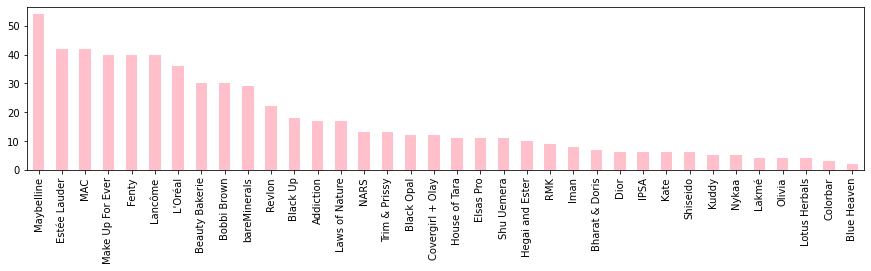

In [55]:
data['brand'].value_counts().plot.bar(figsize=(15, 3), color='pink')


In [56]:
data_name = data['brand'].value_counts()
df = pd.DataFrame(data_name)
df

,brand
Maybelline,54
Estée Lauder,42
MAC,42
Make Up For Ever,40
Fenty,40
Lancôme,40
L'Oréal,36
Beauty Bakerie,30
Bobbi Brown,30
bareMinerals,29


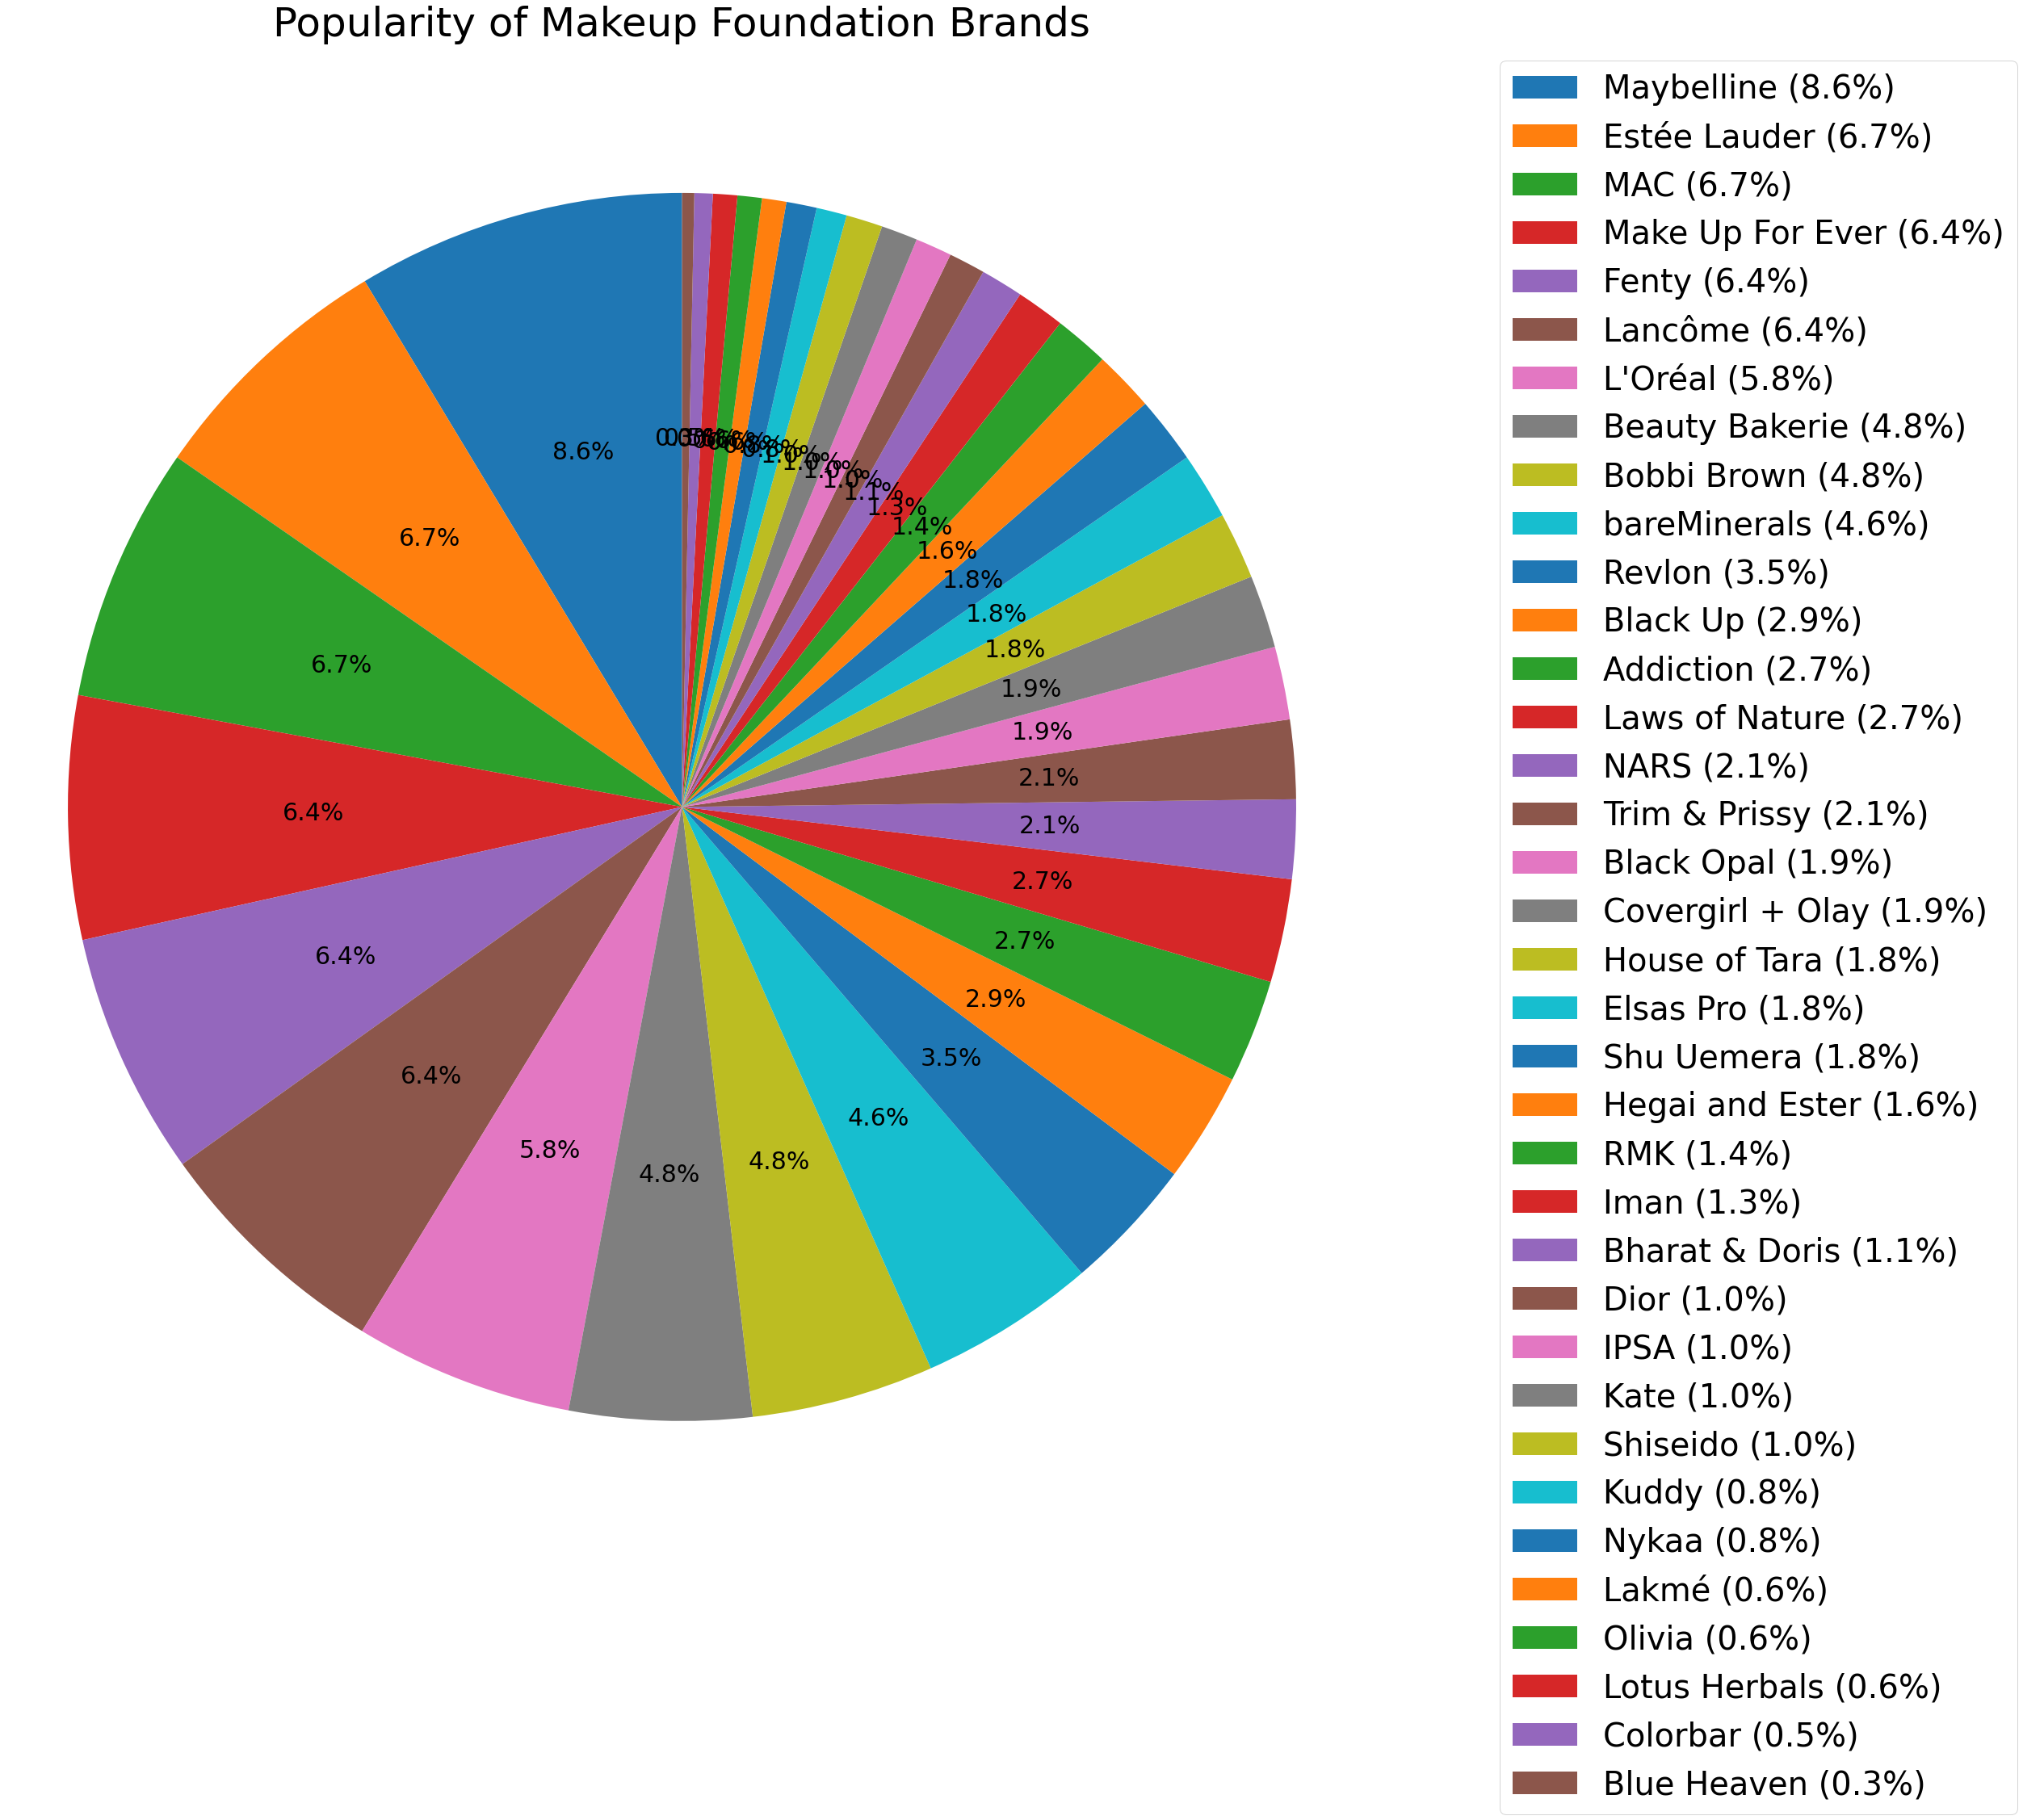

In [92]:
sizes = df['brand']
labels = df.index.tolist()

total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

fig1, ax1 = plt.subplots(figsize=(30, 30))

fig1.subplots_adjust(top=1)

patches, texts, autotexts = ax1.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
for text in texts + autotexts:
    text.set_fontsize(30) 
brand_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(labels, percentages)]
ax1.legend(patches, brand_labels, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='40')
plt.title('Popularity of Makeup Foundation Brands', fontsize=50)  
plt.show()



-----H-----


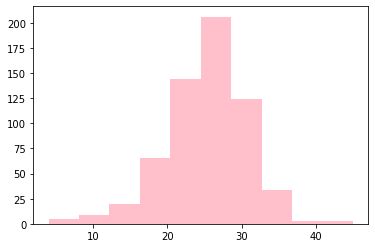

-----S-----


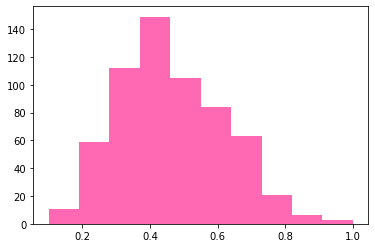

-----V-----


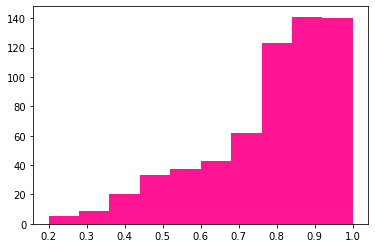

-----L-----


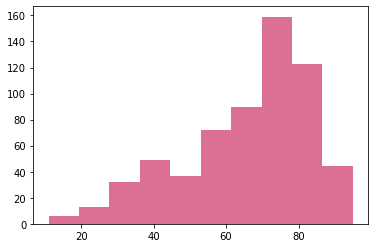

In [91]:
columns = ['H', 'S', 'V', 'L']
colors = ['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093']  # Shades of pink

for idx, column in enumerate(columns):
    x = data[column]
    print('-----' + column + '-----')
    plt.hist(x, color=colors[idx])
    plt.show()

In [90]:
print(f'DataFrame contains {df.shape[0]} rows (records) and {df.shape[1]} columns (attributes).')


DataFrame contains 36 rows (records) and 1 columns (attributes).


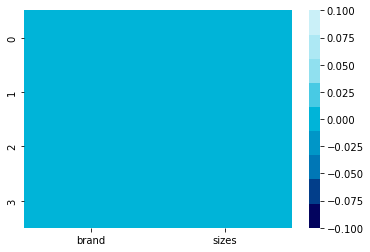

In [95]:
sns.heatmap(df.isnull(), cmap=colors2)
plt.show()

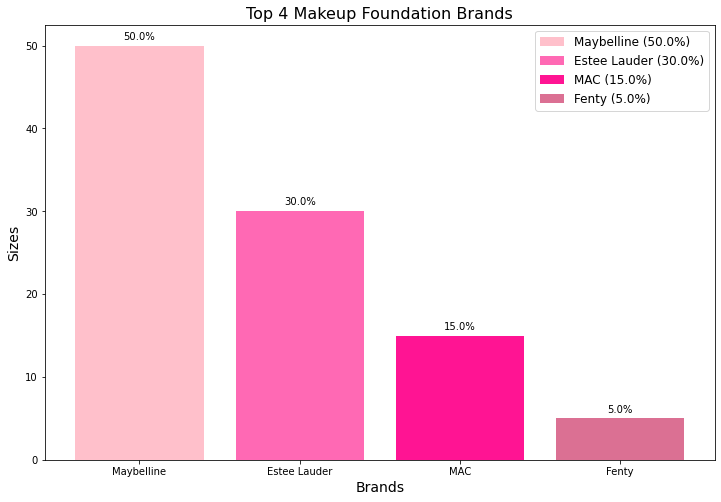

In [94]:
df = pd.DataFrame({
    'brand': ['Maybelline', 'Estee Lauder', 'MAC', 'Fenty'],
    'sizes': [50, 30, 15, 5]
})

sizes = df['sizes']
labels = df['brand']

total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]

plt.figure(figsize=(12, 8))

bars = plt.bar(labels, sizes, color=['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093'])

for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percent:.1f}%', ha='center', va='bottom')
brand_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(labels, percentages)]
plt.legend(bars, brand_labels, loc='upper right', fontsize='large')

plt.title('Top 4 Makeup Foundation Brands', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Sizes', fontsize=14)
plt.show()